In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from setup import setup_matplotlib

setup_matplotlib()

np.random.seed(42)

In [3]:
k = 1
s = 1
D = s**2/2
#N_t = 100
max_t = 6
ntau = 3
dx = 0.2
sb = 20*dx

f = 15
N_p = 16_000


x_s = np.arange(-sb,sb+1e-6,dx)
bins = np.arange(-sb-dx/2,sb+dx/2+1e-5,dx)
N_x = len(x_s)

def force(x,*args):
     return -k*x**3

i_zero = np.argmin(x_s**2)

In [4]:
def sim(ntau_t,dt_t,x0, force):
    """Simulation determinstic delay diferential equation

    Parameters
    ----------
    ntau_t : int
        time delay in units of dt
    dt_t : float
        temporal resolution
    x0 : float
        initial condition
    force : Callable
        force function

    Returns
    -------
    np.ndarray
        the trajectory 
    """
    x = np.empty(100000)
    x[:ntau_t] = 0
    x[ntau_t-1] = x0
    for i in range(ntau_t, len(x)):
        x[i] = x[i-1]+force(x[i-ntau_t])*dt_t
    return x

# Nummerical

In [5]:
det_f = 200
x = np.empty(100000)


def get_con(x0, ntau_t, dt_t ):
    """Check if function converges for given paramters

    Parameters
    ----------
    x0 : float
        inital condition
    ntau_t : int
        time delay in units of dt
    dt_t : float
        temporal resolution

    Returns
    -------
    bool
        converges if true
    """
    x[:ntau_t] = 0
    x[ntau_t-1] = x0
    for i in range(ntau_t, len(x)):
        x[i] = x[i-1]+force(x[i-ntau_t])*dt_t
    return np.isfinite(x[-1]) and x[-1] < x0

def get_oszi(x0, ntau_t, dt_t ):
    """Check if function oszillates for given paramters

    Parameters
    ----------
    x0 : float
        inital condition
    ntau_t : int
        time delay in units of dt
    dt_t : float
        temporal resolution

    Returns
    -------
    bool
        no oszillations if true
    """
    x[:ntau_t] = 0
    x[ntau_t-1] = x0
    for i in range(ntau_t, len(x)):
        x[i] = x[i-1]+force(x[i-ntau_t])*dt_t
    return np.all(x >= 0)


det_ltaus = np.logspace(-2,1,10) #np.arange(0.01,0.21,0.01)
diff_b = []
oszi_b = []


for ltau in det_ltaus:
    x1 = 0.001
    x3 = 60
    
    ntau_t = ntau*det_f
    dt_t = ltau/ntau_t
    
    e1 = get_con(x1, ntau_t, dt_t)
    e3 = get_con(x3, ntau_t, dt_t)
    if not e1 or e3:
        print('Boundarys to small')
    for i in range(10):
        x2 = (x1+x3)/2
        e2 = get_con(x2, ntau_t, dt_t)
        if e2:
            x1 = x2
        else:
            x3 = x2
    diff_b.append((x1+x3)/2)
    
for ltau in det_ltaus:
    x1 = 0.001
    x3 = 60
    
    ntau_t = ntau*det_f
    dt_t = ltau/ntau_t
    
    e1 = get_oszi(x1, ntau_t, dt_t)
    e3 = get_oszi(x3, ntau_t, dt_t)
    if not e1 or e3:
        print('Boundarys to small')
    for i in range(10):
        x2 = (x1+x3)/2
        e2 = get_oszi(x2, ntau_t, dt_t)
        if e2:
            x1 = x2
        else:
            x3 = x2
    oszi_b.append((x1+x3)/2)

/tmp/ipykernel_5898/951007182.py:19: RuntimeWarning: overflow encountered in double_scalars
  return -k*x**3
/tmp/ipykernel_5898/2969857952.py:25: RuntimeWarning: invalid value encountered in double_scalars
  x[i] = x[i-1]+force(x[i-ntau_t])*dt_t
/tmp/ipykernel_5898/2969857952.py:48: RuntimeWarning: invalid value encountered in double_scalars
  x[i] = x[i-1]+force(x[i-ntau_t])*dt_t


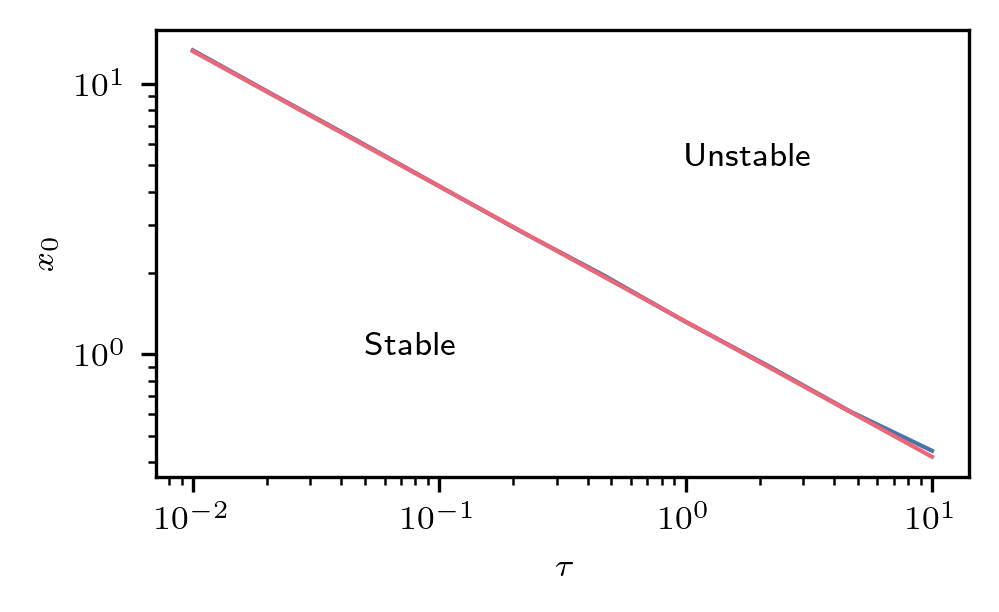

In [6]:
plt.plot(det_ltaus, diff_b)
#plt.plot(det_ltaus, oszi_b)
plt.plot(det_ltaus, np.sqrt(7)/2*det_ltaus**(-1/2))
# plt.plot(det_ltaus,(6/7)*det_ltaus**(-1/2)) # WHy ?? - in both cases pre factor estimated
plt.text(1,5,'Unstable')
plt.text(0.05,1,'Stable')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('$x_0$')
plt.xlabel(r'$\tau$')
plt.tight_layout()
plt.savefig('graphics/x4stability.pdf')